<a href="https://colab.research.google.com/github/MariiaKalinina/Elasticity/blob/main/EAGE_elastic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
# import torch
from math import *
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [ ]:
### Данные для расчета модулей для моделирования

# Vp_reg_air, Vs_reg_air = 5.77, 3.17
# Vp_reg_water, Vs_reg_water = 6.13, 3.25
# Vp_reg_oil, Vs_reg_oil = 6.19, 3.39

# K_air_mtrx, Mu_air_mtrx = velosity2modulus(2.71, Vp_reg_air, Vs_reg_air)
# K_water_mtrx, Mu_water_mtrx = velosity2modulus(2.71, Vp_reg_water, Vs_reg_water)
# K_oil_mtrx, Mu_oil_mtrx = velosity2modulus(2.71, Vp_reg_oil, Vs_reg_oil)

### Air

In [ ]:
path_to_ser = Path('/content/Air.xlsx')
df = pd.read_excel(path_to_ser, sheet_name='1', skiprows=0)

In [ ]:
porosity = df['Porosity']
c11 = df['C11']
c12 = df['C12']
c44 = df['C44']

In [ ]:
K_water, Mu_water, p_water = 2.25, 10**-20, 1.04 ### water
K_air, Mu_air, p_air = 10**-6, 10**-6, 1.22 ### air
p_mtrx = 2.69

In [ ]:
RoMatrix, RoFluid = p_mtrx, p_air

In [ ]:
### Пересчет компонент тензора (С11, С44) в скорость
def modulus2velosity(RoMatrix, RoFluid, porosity, C11, C44): ### <-- K, mu to Vp, Vs
    density = RoMatrix * (1-porosity) + RoFluid * porosity
    Vp = np.sqrt(C11/ density)
    Vs = np.sqrt(C44/density)
    return Vp, Vs

In [ ]:
list_name = ['1', '05', '01', '005', '001']

for name in list_name:

  df = pd.read_excel(path_to_ser, sheet_name=f'{name}', skiprows=0)

  globals()[f'ar_air_{name}'] = pd.DataFrame()

  porosity = df['Porosity']
  c11 = df['C11']
  c12 = df['C12']
  c44 = df['C44']

  globals()[f'ar_air_{name}'][f'Vp'], globals()[f'ar_air_{name}'][f'Vs'] = modulus2velosity(p_mtrx, p_air, porosity, c11, c44)

In [ ]:
import warnings
# warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*findfont: Font family 'Times New Roman' not found.*")

In [ ]:
### Experimental points

path_to_ser = Path('/content/Tver_eage.xlsx')
df_ues = pd.read_excel(path_to_ser, sheet_name='All properties', skiprows=0)

In [ ]:
df_ues.columns

Index(['#', 'Sample', 'Well', 'Litholohy', 'Porosity,%', 'Permeability',
       'Unnamed: 6', 'Density (air)', 'Mineralogical density',
       'Density (water)', 'Density (oil)', 'Vp air', 'Vs air', 'Vp oil',
       'Vs oil', 'Vp water', 'Vs water', 'Unnamed: 17', 'AR thermal',
       'AO electrical', 'Unnamed: 20', 'Ar air', 'Ar water', 'AR oil',
       'Unnamed: 24', 'C11', 'C12', 'C44', 'Vp', 'Vs', 'Unnamed: 30', 'C11.1',
       'C12.1', 'C44.1', 'Vp.1', 'Vs.1', 'Unnamed: 36', 'C11.2', 'C12.2',
       'C44.2', 'Vp.2', 'Vs.2'],
      dtype='object')

In [ ]:
fluid = 'air'
porosity_exp = df_ues['Porosity,%']
Vp_exp = df_ues[f'Vp {fluid}']
Vs_exp = df_ues[f'Vs {fluid}']

In [ ]:
#!pip install mycolorpy

In [ ]:
### Library to make find color based on cmap

from mycolorpy import colorlist as mcp
import numpy as np

color1=mcp.gen_color(cmap="coolwarm",n=4)
print(color1)

ModuleNotFoundError: No module named 'mycolorpy'

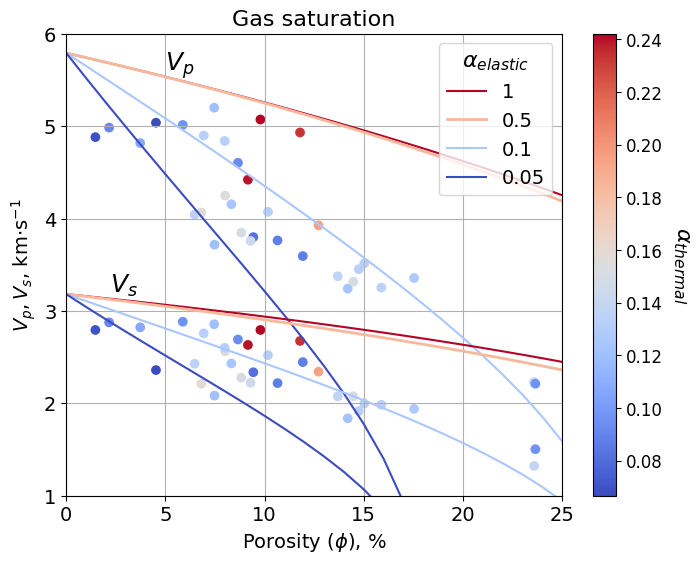

In [ ]:
plt.figure(figsize=(8,6))

# Vp-porosity
porosity_list = df['Porosity']*100

# Vp
plt.plot(porosity_list, ar_air_1['Vp'], color='#b40426', label='1')
plt.plot(porosity_list, ar_air_05['Vp'], color='#f7b89c',  label='0.5', linewidth=2)
plt.plot(porosity_list, ar_air_01['Vp'], color='#aac7fd', label='0.1')
plt.plot(porosity_list, ar_air_005['Vp'],color='#3b4cc0' , label='0.05')
# plt.plot(porosity_list, ar_air_001['Vp'], 'g-', label='0.01')

colors = df_ues['AR thermal']  # Assuming 'AR thermal' contains values to map colors
plt.scatter(porosity_exp, Vp_exp, c=colors, cmap='coolwarm', marker='o')

# Vs
plt.plot(porosity_list, ar_air_1['Vs'], color='#b40426')
plt.plot(porosity_list, ar_air_05['Vs'], color='#f7b89c', linewidth=2,)
plt.plot(porosity_list, ar_air_01['Vs'], color='#aac7fd')
plt.plot(porosity_list, ar_air_005['Vs'],color='#3b4cc0')
# plt.plot(porosity_list, ar_air_001['Vs'], 'g-')
plt.scatter(porosity_exp, Vs_exp, c=colors, cmap='coolwarm', marker='o')

cbar = plt.colorbar()
cbar.set_label(r'$\alpha_{thermal}$', rotation=270, labelpad=20, fontsize=16)
cbar.ax.tick_params(labelsize=12)


plt.xlabel('Porosity $(\phi)$, %', fontsize=14)  # Set x label font to Arial
plt.ylabel('$V_{p}, V_{s}$, km$\cdot$s$^{-1}$', fontsize=14)  # Set y label font to Arial
plt.title('Gas saturation', fontsize=16)  # Set title font to Arial

plt.xticks(fontsize=14)  # Set x ticks font to Arial
plt.yticks(fontsize=14)  # Set y ticks font to Arial

plt.legend(title=r'$\alpha_{elastic}$', fontsize=14, title_fontsize=16, loc='upper right')

# Add description to the plot
plt.text(5, 5.6, '$V_{p}$', fontsize=18, style='italic')
plt.text(2.2, 3.2, '$V_{s}$', fontsize=18, style='italic')

plt.xlim(0, 25)
plt.ylim(1, 6)
plt.grid()

plt.show()

In [ ]:
#8-10% - Vp, Vs


### Water

In [ ]:
path_to_ser = Path('/content/Water.xlsx')
df = pd.read_excel(path_to_ser, sheet_name='1', skiprows=0)

In [ ]:
porosity = df['Porosity']
c11 = df['C11']
c12 = df['C12']
c44 = df['C44']

In [ ]:
K_water, Mu_water, p_water = 2.25, 10**-20, 1.04 ### water
K_air, Mu_air, p_air = 10**-6, 10**-6, 1.22 ### air
p_mtrx = 2.69

In [ ]:
RoMatrix, RoFluid = p_mtrx, p_water

In [ ]:
### Пересчет компонент тензора (С11, С44) в скорость
def modulus2velosity(RoMatrix, RoFluid, porosity, C11, C44): ### <-- K, mu to Vp, Vs
    density = RoMatrix * (1-porosity) + RoFluid * porosity
    Vp = np.sqrt(C11/ density)
    Vs = np.sqrt(C44/density)
    return Vp, Vs

In [ ]:
list_name = ['1', '05', '01', '005', '001']

for name in list_name:

  df = pd.read_excel(path_to_ser, sheet_name=f'{name}', skiprows=0)

  globals()[f'ar_water_{name}'] = pd.DataFrame()

  porosity = df['Porosity']
  c11 = df['C11']
  c12 = df['C12']
  c44 = df['C44']

  globals()[f'ar_water_{name}'][f'Vp'], globals()[f'ar_water_{name}'][f'Vs'] = modulus2velosity(p_mtrx, p_water, porosity, c11, c44)

In [ ]:
### Experimental points

path_to_ser = Path('/content/Tver_eage.xlsx')
df_ues = pd.read_excel(path_to_ser, sheet_name='All properties', skiprows=0)

In [ ]:
fluid = 'water'
porosity_exp = df_ues['Porosity,%']
Vp_exp = df_ues[f'Vp {fluid}']
Vs_exp = df_ues[f'Vs {fluid}']

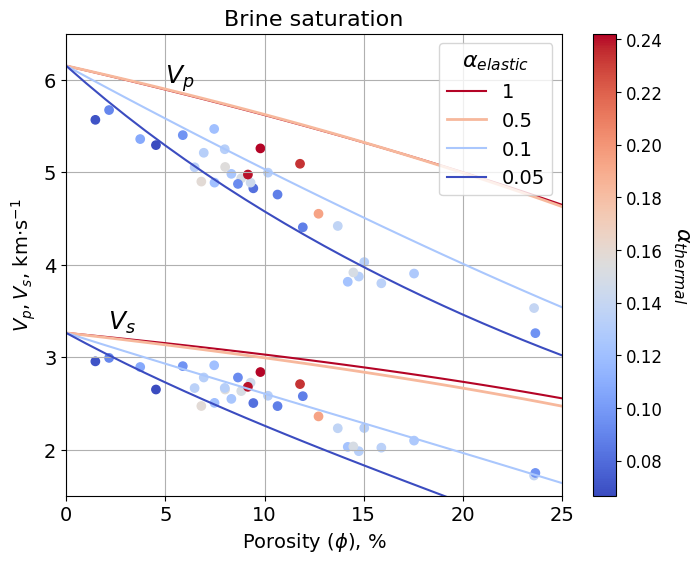

In [ ]:
plt.figure(figsize=(8,6))

# Vp-porosity
porosity_list = df['Porosity']*100

# Vp
plt.plot(porosity_list, ar_water_1['Vp'], color='#b40426', label='1')
plt.plot(porosity_list, ar_water_05['Vp'], color='#f7b89c',  label='0.5', linewidth=2)
plt.plot(porosity_list, ar_water_01['Vp'], color='#aac7fd', label='0.1')
plt.plot(porosity_list, ar_water_005['Vp'],color='#3b4cc0' , label='0.05')
# plt.plot(porosity_list, ar_air_001['Vp'], 'g-', label='0.01')

colors = df_ues['AR thermal']  # Assuming 'AR thermal' contains values to map colors
plt.scatter(porosity_exp, Vp_exp, c=colors, cmap='coolwarm', marker='o')

# Vs
plt.plot(porosity_list, ar_water_1['Vs'], color='#b40426')
plt.plot(porosity_list, ar_water_05['Vs'], color='#f7b89c', linewidth=2,)
plt.plot(porosity_list, ar_water_01['Vs'], color='#aac7fd')
plt.plot(porosity_list, ar_water_005['Vs'],color='#3b4cc0')
# plt.plot(porosity_list, ar_air_001['Vs'], 'g-')
plt.scatter(porosity_exp, Vs_exp, c=colors, cmap='coolwarm', marker='o')

cbar = plt.colorbar()
cbar.set_label(r'$\alpha_{thermal}$', rotation=270, labelpad=20, fontsize=16)
cbar.ax.tick_params(labelsize=12)


plt.xlabel('Porosity $(\phi)$, %', fontsize=14)  # Set x label font to Arial
plt.ylabel('$V_{p}, V_{s}$, km$\cdot$s$^{-1}$', fontsize=14)  # Set y label font to Arial
plt.title('Brine saturation', fontsize=16)  # Set title font to Arial

plt.xticks(fontsize=14)  # Set x ticks font to Arial
plt.yticks(fontsize=14)  # Set y ticks font to Arial

plt.legend(title=r'$\alpha_{elastic}$', fontsize=14, title_fontsize=16, loc='upper right')
# plt.legend(title=r'$\alpha_{elastic}$', fontsize=14, title_fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left')


# Add description to the plot
plt.text(5, 5.96, '$V_{p}$', fontsize=18, style='italic')
plt.text(2.1, 3.3, '$V_{s}$', fontsize=18, style='italic')

plt.xlim(0, 25)
plt.ylim(1.5, 6.5)
plt.grid()

plt.show()